In [3]:
import os, sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from os.path import dirname, abspath
from differentiable_robot_model import DifferentiableRobotModel

from mbirl.keypoint_mpc import KeypointMPCWrapper
from mbirl.learnable_costs import *
import mbirl
import warnings
warnings.filterwarnings('ignore')

EXP_FOLDER = os.path.join(mbirl.__path__[0], "experiments")
traj_data_dir = os.path.join(EXP_FOLDER, 'traj_data')
model_data_dir = os.path.join(EXP_FOLDER, 'model_data')


In [4]:
experiment_type = 'placing'

In [5]:
# Get data saved during training

if not os.path.exists(
        f"{model_data_dir}/{experiment_type}_TimeDep") or not os.path.exists(
    f"{model_data_dir}/{experiment_type}_Weighted") or not os.path.exists(f"{model_data_dir}/{experiment_type}_RBF"):
    assert False, "Path does not exist"

timedep = torch.load(f"{model_data_dir}/{experiment_type}_TimeDep")
weighted = torch.load(f"{model_data_dir}/{experiment_type}_Weighted")
rbf = torch.load(f"{model_data_dir}/{experiment_type}_RBF")

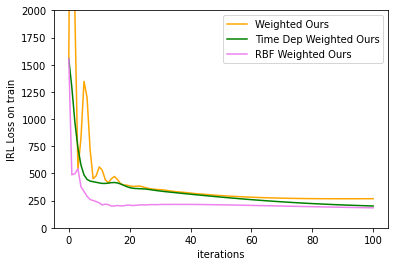

In [6]:
# IRL Loss on train trajectories, as a function of cost function updates

plt.figure()
plt.plot(weighted['irl_loss_train'].detach(), color='orange', label="Weighted Ours")
plt.plot(timedep['irl_loss_train'].detach(), color='green', label="Time Dep Weighted Ours")
plt.plot(rbf['irl_loss_train'].detach(), color='violet', label="RBF Weighted Ours")
plt.xlabel("iterations")
plt.ylabel("IRL Loss on train")
plt.ylim([0, 2000])
plt.legend()

plt.savefig(f"{model_data_dir}/{experiment_type}_IRL_loss_train.png")

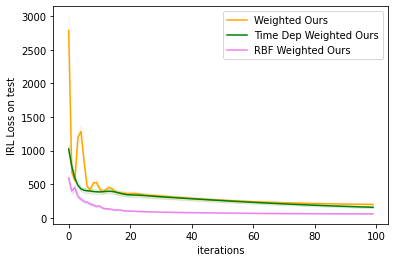

In [7]:
# IRL Loss on test trajectories, as a function of cost function updates

plt.figure()
weighted_trace = weighted['irl_loss_test'].detach()
w_mean = weighted_trace.mean(dim=-1)
w_std = weighted_trace.std(dim=-1)
timedep_trace = timedep['irl_loss_test'].detach()
t_mean = timedep_trace.mean(dim=-1)
t_std = timedep_trace.std(dim=-1)
rbf_trace = rbf['irl_loss_test'].detach()
r_mean = rbf_trace.mean(dim=-1)
r_std = rbf_trace.std(dim=-1)
plt.plot(w_mean, color='orange', label="Weighted Ours")
plt.fill_between(np.arange(len(w_mean)), w_mean - w_std, w_mean + w_std, color='orange', alpha=0.1)
plt.plot(t_mean, color='green', label="Time Dep Weighted Ours")
plt.fill_between(np.arange(len(t_mean)), t_mean - t_std, t_mean + t_std, color='green', alpha=0.1)
plt.plot(r_mean, color='violet', label="RBF Weighted Ours")
plt.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, color='blueviolet', alpha=0.1)
plt.xlabel("iterations")
plt.ylabel("IRL Loss on test")
plt.legend()

plt.savefig(f"{model_data_dir}/{experiment_type}_IRL_loss_test.png")
plt.show()